# Muneeb Ali DSINT261024-XT0003

# Fraud Detection in Credit Card Transactions:

## i. Data Understanding And Pre-Processing:

### Importing Libraries:

In [5]:
import pandas as pd
import warnings
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
#handles warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [7]:
#Reading CSV
df = pd.read_csv('fraud_detection_data.csv')

In [8]:
df.head()

,Transaction ID,Customer ID,Transaction Date,Transaction Amount,Merchant,Location,Transaction Type,Card Type,Is Fraudulent
0,90023589-2ef8-43e7-807a-b4ab92fcc2a4,5d7358c2-ede9-488a-96e4-fa78a9d9d6db,2024-03-05 15:53:49,231.55,Torres-Sanchez,West Adam,Online Purchase,MasterCard,Yes
1,3eb2e762-9525-4c33-a022-a47e3da3ec5d,0aac2ab4-f920-428a-939a-78ff9858c13d,2024-07-04 01:00:25,1485.69,"Brandt, Ross and Butler",New Benjaminbury,In-Store Purchase,Discover,Yes
2,12d58e99-92d7-46f3-8ac0-e01ac86c15ec,4d6ee059-5df1-4323-8484-2f04aae3d6b3,2024-01-14 00:18:53,497.33,Delgado LLC,Lake Jamieberg,ATM Withdrawal,Amex,Yes
3,e9cac917-d336-4629-9baa-f8c19691cb80,d7709d08-fa3c-419c-b2fb-bc9ef2997ef9,2023-12-09 03:06:54,287.68,"Smith, Mcdonald and Cruz",Lake James,In-Store Purchase,Visa,Yes
4,acb39efa-d3c7-4bae-9b6c-9cda5ed79503,e505e3e6-7982-4c7f-b0b1-26a0b6d59d31,2024-02-17 03:22:55,213.97,Huff Ltd,Lake Anthony,In-Store Purchase,Discover,No


In [9]:
#363 rows and 9 columns
df.shape 

(363, 9)

In [10]:
df.describe()

,Transaction Amount
count,363.000000
mean,977.349972
std,581.386431
min,14.290000
25%,476.700000
50%,992.100000
75%,1469.630000
max,1994.680000


In [11]:
#8 features columns and one label column
df.columns 

Index(['Transaction ID', 'Customer ID', 'Transaction Date',
       'Transaction Amount', 'Merchant', 'Location', 'Transaction Type',
       'Card Type', 'Is Fraudulent'],
      dtype='object')

In [12]:
df.dtypes

Transaction ID         object
Customer ID            object
Transaction Date       object
Transaction Amount    float64
Merchant               object
Location               object
Transaction Type       object
Card Type              object
Is Fraudulent          object
dtype: object

In [13]:
#no null value founded in the dataset
df.isnull().sum() 

Transaction ID        0
Customer ID           0
Transaction Date      0
Transaction Amount    0
Merchant              0
Location              0
Transaction Type      0
Card Type             0
Is Fraudulent         0
dtype: int64

In [14]:
#No dublicated founded in dataset
df.duplicated().sum() 

0

In [15]:
# Standerizing date time column:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df['Transaction Date'].dt.year

0      2024
1      2024
2      2024
3      2023
4      2024
       ... 
358    2024
359    2024
360    2023
361    2024
362    2023
Name: Transaction Date, Length: 363, dtype: int32

In [16]:
# Create a dictionary to store the LabelEncoders for each categorical column
encoders = {}

# List of categorical columns to encode
categorical_cols = ['Merchant', 'Location', 'Transaction Type', 'Card Type']

# Apply LabelEncoder to each categorical column and store the encoder
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  # Save the encoder for later use

# Encode the target variable (Is Fraudulent)
le_is_fraudulent = LabelEncoder()
df['Is Fraudulent'] = le_is_fraudulent.fit_transform(df['Is Fraudulent'])

In [17]:
df.head()

,Transaction ID,Customer ID,Transaction Date,Transaction Amount,Merchant,Location,Transaction Type,Card Type,Is Fraudulent
0,90023589-2ef8-43e7-807a-b4ab92fcc2a4,5d7358c2-ede9-488a-96e4-fa78a9d9d6db,2024-03-05 15:53:49,231.55,319,325,2,2,1
1,3eb2e762-9525-4c33-a022-a47e3da3ec5d,0aac2ab4-f920-428a-939a-78ff9858c13d,2024-07-04 01:00:25,1485.69,31,176,1,1,1
2,12d58e99-92d7-46f3-8ac0-e01ac86c15ec,4d6ee059-5df1-4323-8484-2f04aae3d6b3,2024-01-14 00:18:53,497.33,81,125,0,0,1
3,e9cac917-d336-4629-9baa-f8c19691cb80,d7709d08-fa3c-419c-b2fb-bc9ef2997ef9,2023-12-09 03:06:54,287.68,296,123,1,3,1
4,acb39efa-d3c7-4bae-9b6c-9cda5ed79503,e505e3e6-7982-4c7f-b0b1-26a0b6d59d31,2024-02-17 03:22:55,213.97,146,117,1,1,0


In [18]:
#checking data balancing
class_distribution = df['Is Fraudulent'].value_counts()
class_distribution_perc = df['Is Fraudulent'].value_counts(normalize= True) * 100
class_distribution_perc

Is Fraudulent
1    50.413223
0    49.586777
Name: proportion, dtype: float64

In [19]:
class_distribution #data is balanced

Is Fraudulent
1    183
0    180
Name: count, dtype: int64

In [20]:
# data is balanced
majority_class = df['Is Fraudulent'].value_counts().idxmax()
minority_class = df['Is Fraudulent'].value_counts().idxmin()
majority_count = df['Is Fraudulent'].value_counts().max()
minority_count = df['Is Fraudulent'].value_counts().min()
imbalance_ratio = majority_count / minority_count

print(f'Imbalance Ratio: {imbalance_ratio}')

Imbalance Ratio: 1.0166666666666666


<module 'matplotlib' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\matplotlib\\__init__.py'>

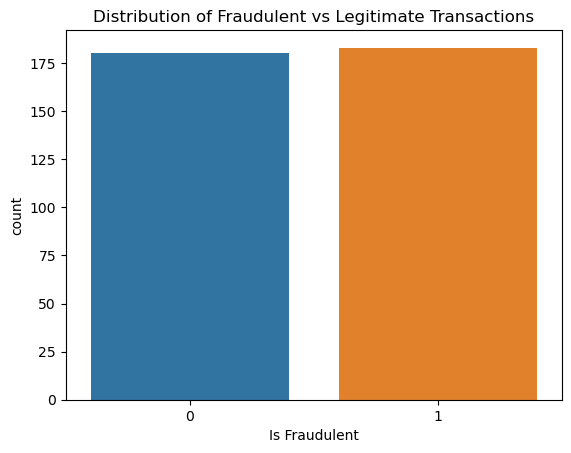

In [21]:
# Creating the bar graph
ax = sns.countplot(x='Is Fraudulent', data=df, palette=['#1f77b4', '#ff7f0e'])

# Set the title using ax.set_title
ax.set_title('Distribution of Fraudulent vs Legitimate Transactions')

# Display the plot
plt

<module 'matplotlib' from 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\matplotlib\\__init__.py'>

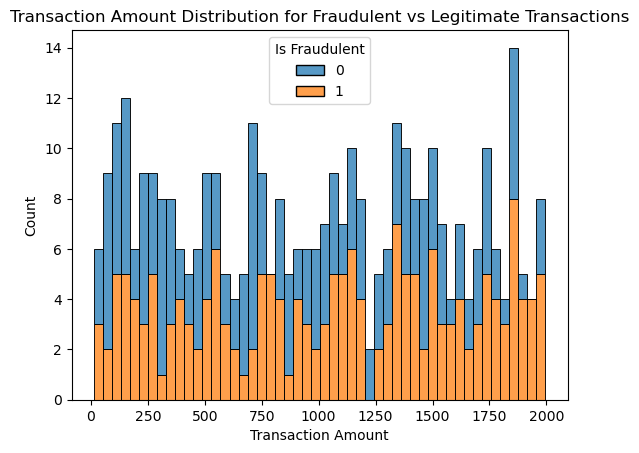

In [22]:
# Distribution of transaction amounts for fraudulent vs legitimate transactions
ax = sns.histplot(data=df, x='Transaction Amount', hue='Is Fraudulent', multiple='stack', bins=50)
ax.set_title('Transaction Amount Distribution for Fraudulent vs Legitimate Transactions')
plt

## ii. Feature Engineering:

In [24]:
# Calculate frequency of transactions by customer
df['Transaction Frequency'] = df.groupby('Customer ID')['Customer ID'].transform('count')
df['Transaction Frequency']

0      1
1      1
2      1
3      1
4      1
      ..
358    1
359    1
360    1
361    1
362    1
Name: Transaction Frequency, Length: 363, dtype: int64

In [25]:
#Average Transaction Amount
df['Average Transaction Amount'] = df.groupby('Customer ID')['Transaction Amount'].transform('mean')
df['Average Transaction Amount']

0       231.55
1      1485.69
2       497.33
3       287.68
4       213.97
        ...   
358    1197.18
359     697.92
360    1574.99
361     878.42
362    1968.63
Name: Average Transaction Amount, Length: 363, dtype: float64

In [26]:
# Filter for fraudulent transactions and select the 'Card Type' column
fraudulent_card_types = df[df['Is Fraudulent'] == 'Yes']['Card Type']
fraudulent_card_types.value_counts()

Series([], Name: count, dtype: int64)

In [27]:
#Time of Day of Transactions
df['Transaction Hour'] = df['Transaction Date'].dt.hour

In [28]:
#Interaction Features
df['Type_Amount Interaction'] = df['Transaction Type'] * df['Transaction Amount']

In [30]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Date',
       'Transaction Amount', 'Merchant', 'Location', 'Transaction Type',
       'Card Type', 'Is Fraudulent', 'Transaction Frequency',
       'Average Transaction Amount', 'Transaction Hour',
       'Type_Amount Interaction'],
      dtype='object')

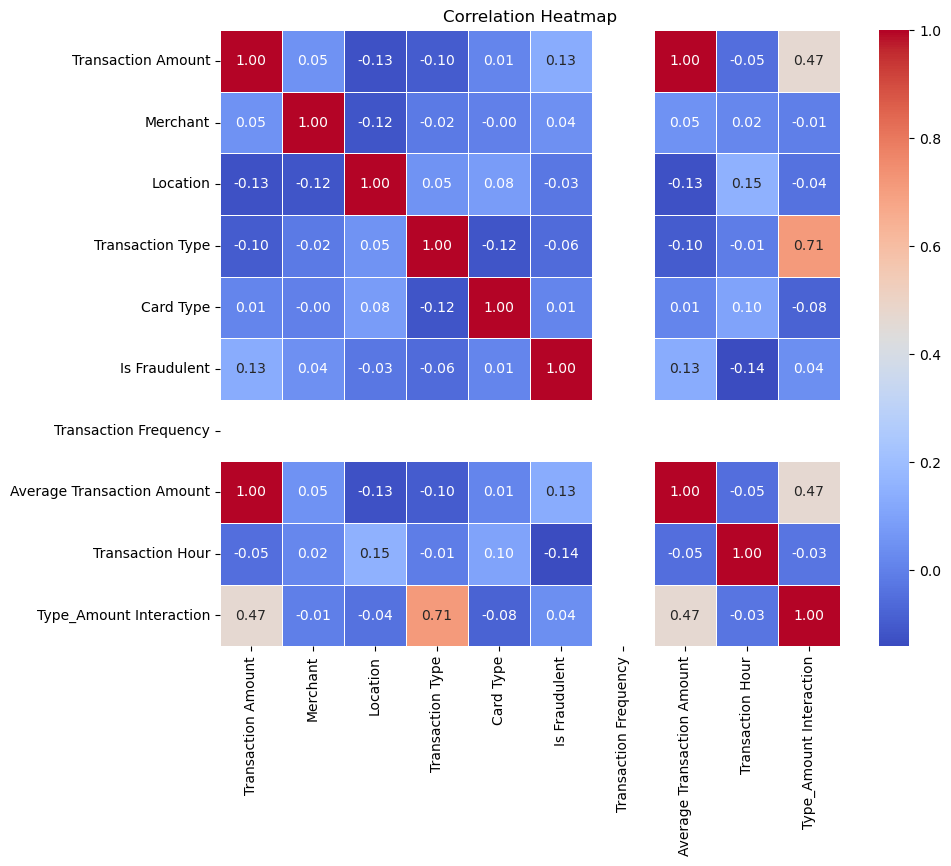

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your already encoded DataFrame
# Drop 'Transaction ID', 'Customer ID', and 'Transaction Date'
df_encoded = df.drop(['Transaction ID', 'Customer ID', 'Transaction Date'], axis=1)

# Compute the correlation matrix for the encoded data
corr_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## iii. Model Building:

In [40]:
# splitting dataset

from sklearn.model_selection import train_test_split

# Extracting Year, Month, and Day of Week from Transaction Date
df['Transaction Year'] = df['Transaction Date'].dt.year
df['Transaction Month'] = df['Transaction Date'].dt.month
df['Transaction DayOfWeek'] = df['Transaction Date'].dt.dayofweek

# Drop the original Transaction Date column
df = df.drop('Transaction Date', axis=1)

X = df.drop(['Is Fraudulent', 'Transaction ID','Customer ID'], axis=1)  # Drop label and any non-feature columns
y = df['Is Fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
print(X_train.dtypes)

Transaction Amount            float64
Merchant                        int32
Location                        int32
Transaction Type                int32
Card Type                       int32
Transaction Frequency           int64
Average Transaction Amount    float64
Transaction Hour                int32
Type_Amount Interaction       float64
Transaction Year                int32
Transaction Month               int32
Transaction DayOfWeek           int32
dtype: object


### Experiment with Different Machine Learning Algorithms:

In [45]:
#Logistic Regression
# Assuming X is now cleaned and contains only numeric features
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'AUC-ROC: {roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])}')

              precision    recall  f1-score   support

           0       0.61      0.55      0.58        56
           1       0.57      0.62      0.59        53

    accuracy                           0.59       109
   macro avg       0.59      0.59      0.59       109
weighted avg       0.59      0.59      0.59       109

AUC-ROC: 0.5956873315363881


In [47]:
#Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'AUC-ROC: {roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])}')

              precision    recall  f1-score   support

           0       0.55      0.57      0.56        56
           1       0.53      0.51      0.52        53

    accuracy                           0.54       109
   macro avg       0.54      0.54      0.54       109
weighted avg       0.54      0.54      0.54       109

AUC-ROC: 0.5256064690026954


In [49]:
#Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(f'AUC-ROC: {roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])}')

              precision    recall  f1-score   support

           0       0.61      0.61      0.61        56
           1       0.58      0.58      0.58        53

    accuracy                           0.60       109
   macro avg       0.60      0.60      0.60       109
weighted avg       0.60      0.60      0.60       109

AUC-ROC: 0.5192048517520216


In [51]:
param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],  # Added more options for n_estimators
    'max_depth': [None, 10, 20, 30, 40],  # Added deeper trees
    'min_samples_split': [2, 5, 10, 15],  # Increased the options for min_samples_split
    'min_samples_leaf': [1, 2, 4],  # New parameter: min_samples_leaf to prevent overfitting
    'bootstrap': [True, False],  # Added an option to explore both bootstrap methods
    'max_features': ['auto', 'sqrt', 'log2']  # New parameter: max_features to control feature selection
}

# Perform Grid Search with the expanded parameter grid
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best AUC-ROC score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best AUC-ROC: {grid_search.best_score_}')


Fitting 5 folds for each of 1800 candidates, totalling 9000 fits
Best Parameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best AUC-ROC: 0.6342307692307692


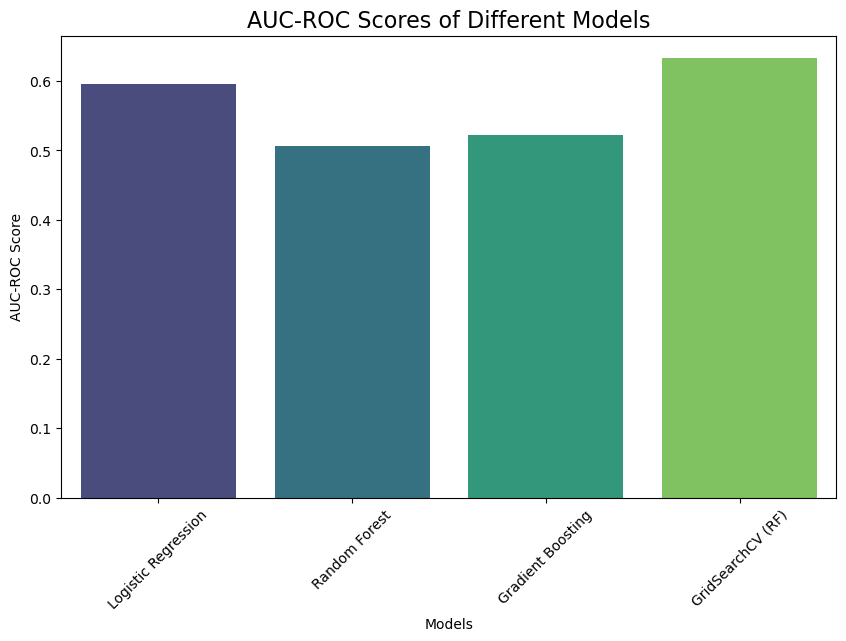

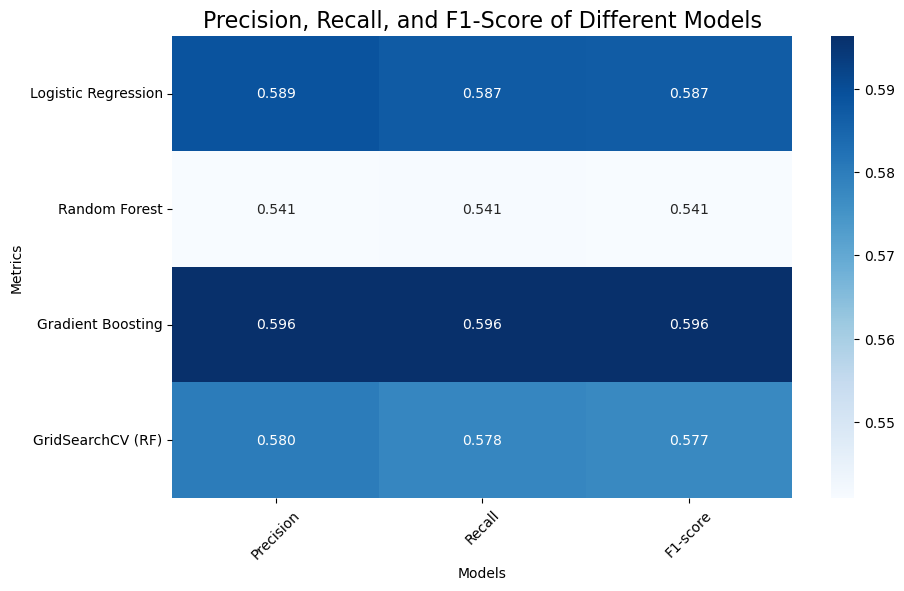

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

# Define the model names and their respective AUC-ROC scores
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'GridSearchCV (RF)']
auc_roc_scores = [0.5957, 0.5061, 0.5226, 0.6335]

# Create a DataFrame to hold the AUC-ROC scores
auc_df = pd.DataFrame({'Model': models, 'AUC-ROC': auc_roc_scores})

# Plot AUC-ROC scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='AUC-ROC', data=auc_df, palette='viridis')
plt.title('AUC-ROC Scores of Different Models', fontsize=16)
plt.ylabel('AUC-ROC Score')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.show()

# Assuming you have saved classification reports in a dictionary
classification_reports = {
    'Logistic Regression': classification_report(y_test, lr_model.predict(X_test), output_dict=True),
    'Random Forest': classification_report(y_test, rf_model.predict(X_test), output_dict=True),
    'Gradient Boosting': classification_report(y_test, gb_model.predict(X_test), output_dict=True),
    'GridSearchCV (RF)': classification_report(y_test, grid_search.predict(X_test), output_dict=True)
}

# Convert classification reports into a DataFrame for better visualization
precision_recall_f1 = pd.DataFrame({
    model: [classification_reports[model]['weighted avg']['precision'], 
            classification_reports[model]['weighted avg']['recall'], 
            classification_reports[model]['weighted avg']['f1-score']]
    for model in classification_reports.keys()
}, index=['Precision', 'Recall', 'F1-score']).T

# Plot Precision, Recall, and F1-score for each model
plt.figure(figsize=(10, 6))
sns.heatmap(precision_recall_f1, annot=True, cmap='Blues', fmt='.3f')
plt.title('Precision, Recall, and F1-Score of Different Models', fontsize=16)
plt.ylabel('Metrics')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.show()

# Based on AUC-ROC score, GridSearchCV (RF) seems the best model
best_model = grid_search.best_estimator_


## iv. Fraud Detection System Design:

### Testing Model with sample data:

In [54]:
def encode_new_transaction(new_data, encoders):
    # Encode the categorical columns using the saved LabelEncoders
    new_data['Merchant'] = encoders['Merchant'].transform([new_data['Merchant']])[0]
    new_data['Location'] = encoders['Location'].transform([new_data['Location']])[0]
    new_data['Transaction Type'] = encoders['Transaction Type'].transform([new_data['Transaction Type']])[0]
    new_data['Card Type'] = encoders['Card Type'].transform([new_data['Card Type']])[0]
    
    # Convert the dictionary to a DataFrame
    new_transaction_df = pd.DataFrame([new_data])
    
    # Convert the DataFrame to a NumPy array for prediction
    return new_transaction_df.to_numpy()

# Sample new transaction data (before encoding)
new_transaction_data = {
    'Transaction Amount': 213.97,
    'Merchant': 'Torres-Sanchez',  # Raw categorical values
    'Location': 'West Adam',
    'Transaction Type': 'Online Purchase',
    'Card Type': 'Discover',
    'Transaction Year': 2024,
    'Transaction Month': 2,
    'Transaction DayOfWeek': 5,
    'Additional_Feature_1': 0,
    'Additional_Feature_2': 1,
    'Additional_Feature_3': 1,
    'Additional_Feature_4': 0
}

# Encode and predict using the stored encoders
encoded_data = encode_new_transaction(new_transaction_data, encoders)
sample_pred = grid_search.best_estimator_.predict(encoded_data)
sample_pred_proba = grid_search.best_estimator_.predict_proba(encoded_data)

# Predicted class (numerical)
predicted_class = sample_pred[0]

# Decode the predicted class to its original label (e.g., 'yes' or 'no')
decoded_class = le_is_fraudulent.inverse_transform([predicted_class])[0]

# Output the decoded prediction
print(f"Predicted class for the new transaction: {decoded_class}")
print(f"Predicted probability for each class: {sample_pred_proba}")


Predicted class for the new transaction: No
Predicted probability for each class: [[0.54152547 0.45847453]]
